In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams.update({'font.size': 22})

# Questão 1

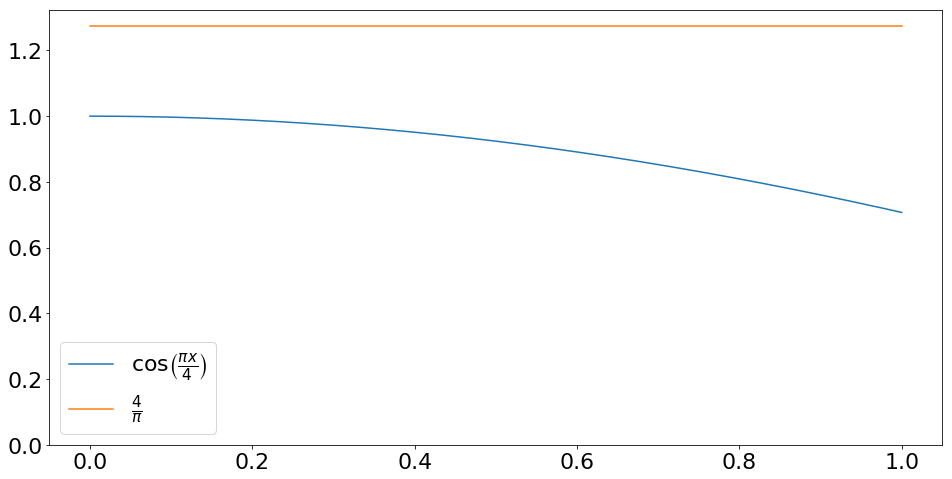

In [3]:
xs = linspace(0, 1, 1001)

f = lambda x: cos(pi * x / 4)
g = lambda x: 2 * ones_like(x) / pi

figure(figsize=(16,8))
ylim([0, 4 / pi + 5e-2])
plot(xs, f(xs), label=r"$\cos\left( \frac{\pi x}{4}\right)$")
#plot(xs, g(xs), label=r"$\frac{2}{\pi}$")
plot(xs, 2 * g(xs), label=r"$\frac{4}{\pi}$")
legend()

In [4]:
def sample(n):
    x = rand(n, 2)
    x[:, 1] *= 4 / pi
    return x

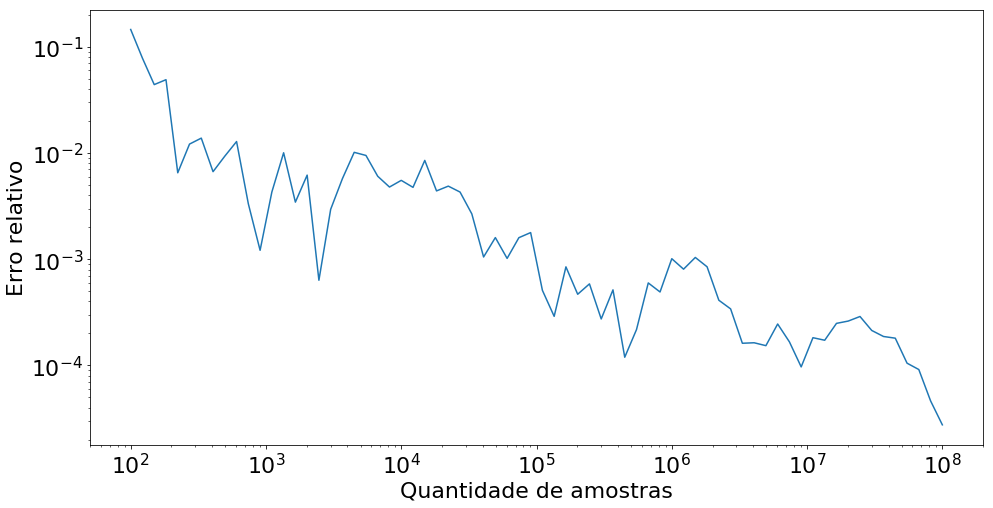

In [5]:
seed(2)
n = int(1e+8)
samples = sample(n)
aux = f(samples[:, 0])

evals = logspace(2, log10(n), 70)
estimativa = array([sum(samples[:int(i), 1] < aux[:int(i)]) / int(i) for i in evals])

figure(figsize=(16,8))

ylabel("Erro relativo")
xlabel("Quantidade de amostras")

loglog(evals, abs(2*estimativa - sqrt(2)) / sqrt(2));

# Questão 2

In [6]:
def sampleExp(λ, n):
    us = np.random.rand(n)
    inverseCDF = lambda u: - log(1 - u) / λ
    return inverseCDF(us)

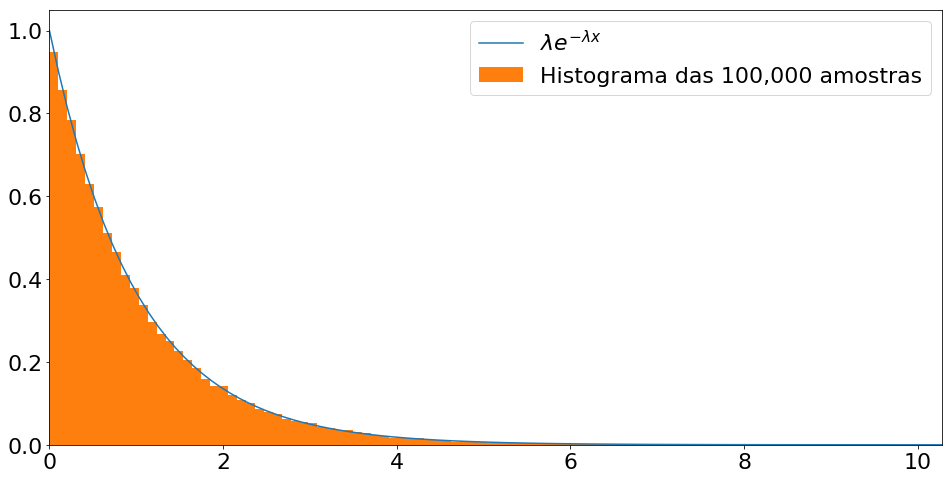

In [7]:
λ = 1
n = 100000

pdf = lambda x: λ * e ** (- λ * x)

samples = sampleExp(λ, n)
xs = linspace(0, max(samples), 100)

figure(figsize=(16,8))
xlim([0, max(samples)])

plot(xs, pdf(xs), label="$λ e^{-λx}$")
hist(samples, bins=100, density=True, label = "Histograma das {:,} amostras".format(n));
legend();

In [8]:
def samplePareto(α, μ, n):
    us = np.random.rand(n)
    inverseCDF = lambda u: μ / (1 - u) ** (1 / α)
    return inverseCDF(us)

In [9]:
def cumulativeHistogram(xs, samples):
    return array([sum(i > samples) / len(samples) for i in xs])

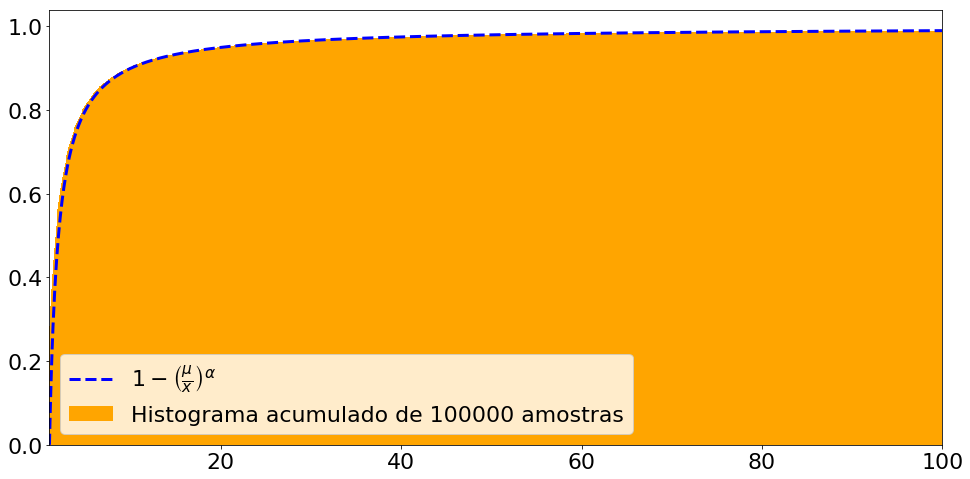

In [10]:
α = 1
μ = 1
n = 100000

cdf = lambda x: 1 - (μ / x) ** α

samples = samplePareto(α, μ, n)
xs = linspace(μ, 100, 1000)

figure(figsize=(16,8))
xlim([μ, 100])

bar(xs, cumulativeHistogram(xs, samples), color='orange', label="Histograma acumulado de {} amostras".format(n))
plot(xs, cdf(xs), '--b', lw=3, label=r"$1 - \left(\frac{\mu}{x}\right)^{\alpha}$")
legend();

# Questão 3

In [1]:
import requests
import numpy as np
from IPython.display import clear_output

In [2]:
def exists(url):
    try:
        requests.get(url)
        return True
    except:
        return False

In [3]:
def sampleTamanhos(k):
    probs = [26 ** (i) * 25 / (26**k - 1) for i in range(k)]
    acum = np.array([sum(probs[:i]) for i in range(k)])
    return sum(np.random.rand() > acum)

In [4]:
def sampleDominio(i):
    letras = "abcdefghijklmnopqrstuvwxyz"
    inteiros = (np.random.rand(i) * 26).astype(int)
    return "".join([letras[j] for j in inteiros])

In [5]:
k = 4
n = 10000

tamanhos = [sampleTamanhos(k) for i in range(n)]
dominios = ["http://www.{}.ufrj.br".format(sampleDominio(i)) for i in tamanhos]

In [6]:
existe = []

for i, j in enumerate(dominios):
    if i % 10 == 0:
        clear_output(wait=True)
        print("{}/{}".format(i, n))
    existe.append(exists(j))

9990/10000


In [35]:
amostras = [50, 950, 3000, 6000]
dominios2 = [["http://www.{}.ufrj.br".format(sampleDominio(i+1)) for _ in range(j)] for i, j in enumerate(amostras)]

In [42]:
existe2 = []

count = 0
for aux in dominios2:
    a = []
    for i in aux:
        if count % 10 == 0:
            clear_output(wait=True)
            print("{}/{}".format(count, n))
        a.append(exists(i))
        count += 1
    existe2.append(a)

9990/10000


In [44]:
[sum(i) for i in existe2]

[0, 15, 9, 0]

In [ ]:
letras = "abcdefghijklmnopqrstuvwxyz"
dominios1 = [letras[i] for i in range(26)]
dominios2 = ["".join([letras[i], letras[j]]) for i in range(26) for j in range(26)]
dominios3 = ["".join([letras[i], letras[j], letras[k]]) for i in range(26) for j in range(26) for k in range(26)]
dominios4 = ["".join([letras[i], letras[j], letras[k], letras[l]]) for i in range(26) for j in range(26) for k in range(26) for l in range(26)]

In [ ]:
existe3 = []
n = len(dominios1) + len(dominios2) + len(dominios3) + len(dominios4)

count = 0
for aux in [dominios1, dominios2, dominios3, dominios4]:
    a = []
    for i in aux:
        if count % 10 == 0:
            clear_output(wait=True)
            print("{}/{}".format(count, n))
        a.append(exists("http://www.{}.ufrj.br".format(i)))
        count += 1
    existe3.append(a)

In [ ]:
[sum(i) for i in existe]

# Questão 4

In [11]:
def sampleExp(lamb, n):
    us = np.random.rand(n)
    inverseCDF = lambda u: - log(1 - u) / lamb
    return inverseCDF(us)

expPdf = lambda lamb, x: lamb * e ** (- lamb * x)
normPdf = lambda x: e ** (-x ** 2 / 2) / sqrt(2 * pi)

def sampleNormal(n):
    a = []
    while len(a) < n:
        k = n - len(a)
        samples = sampleExp(1, k)
        coins = np.random.rand(k) * expPdf(1, samples)
        accepted = coins <= normPdf(samples)
        a += list(samples[accepted])
    return array(a) * (-1) ** (np.random.rand(n) > 0.5)

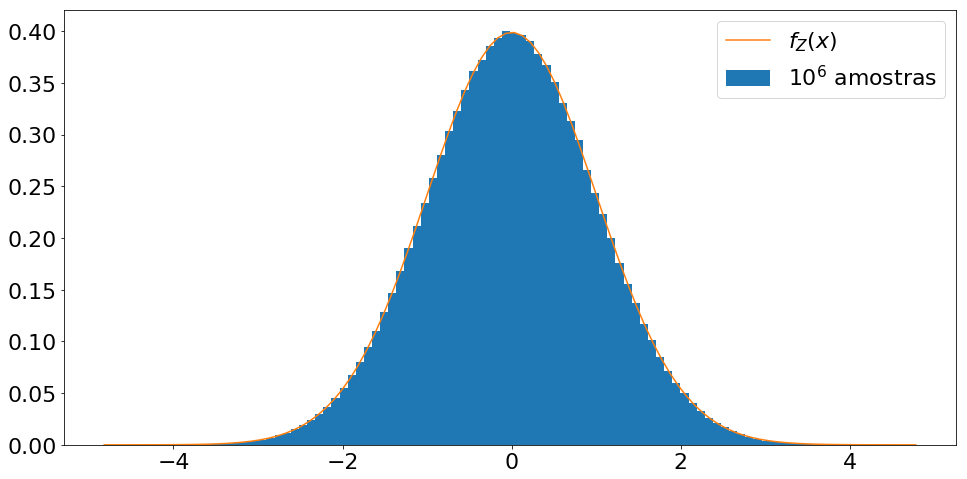

In [12]:
a = sampleNormal(1000000)

figure(figsize=(16,8))

hist(a, bins=100, density=True, label="$10^6$ amostras");

xs = linspace(min(a), max(a), 100)
plot(xs, normPdf(xs), label="$f_Z(x)$")
legend();

# Questão 5

In [13]:
N = int(1e+6)

In [14]:
f1 = lambda x: x * log(x)
f2 = lambda x: x
f3 = lambda x: (x ** 2 - x / N) / x

In [15]:
def segundoMomento(n, h, norm=1e0):
    k = sum([h(i) for i in range(1, n+1)])
    return k * sum([(i * log(i)) ** 2 / norm / h(i) for i in range(1, n+1)])

In [16]:
segundoMomento(N, f2, norm=1e+9) - segundoMomento(N, f3, norm=1e+9)

6088.0

In [17]:
valorReal = sum([i * log(i) for i in range(1, int(N)+1)])

In [18]:
def amostraSoma(n, N):
    k = N * (N + 1) / 2 + 1
    h = lambda x: (x ** 2 - x / N) / x / k
    pesos = array([h(i) for i in range(1, int(N)+1)])
    pesosAcum = pesos.cumsum()
    print("Ta rodando")
    samples = array([sum(i > pesosAcum) for i in np.random.rand(n)])
    print("Rodou")
    return samples * log(samples) / h(samples)

In [19]:
%time samples = amostraSoma(int(1e+6), N)

Ta rodando
Rodou
CPU times: user 15min 51s, sys: 109 ms, total: 15min 51s
Wall time: 15min 51s


In [20]:
samplesAcum = samples.cumsum()

In [21]:
estimativas = array([samplesAcum[i] / (i + 1) for i in range(N)])

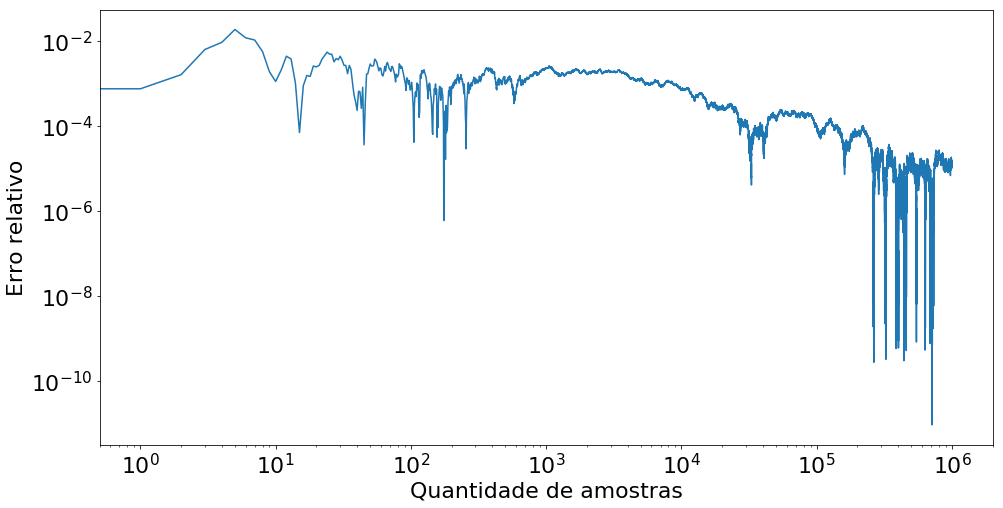

In [22]:
figure(figsize=(16,8))

xlabel("Quantidade de amostras")
ylabel("Erro relativo")
loglog(abs(estimativas - valorReal) / valorReal)

# Questão 6

In [23]:
g = lambda α, a, b: (b**(α + 1) - a**(α + 1)) / (α + 1)

def estimaG(α, a, b, n):
    Y = (b - a) * (np.random.rand(n) * (b - a) + a) ** α
    Yacum = Y.cumsum()
    return array([Yacum[i] / (i+1) for i in range(n)])

In [24]:
n = 1000000
αs = [1, 2, 3]
a = 0
bs = [1, 2, 4]

estimativas = [[estimaG(α, a, b, n) for b in bs] for α in αs]

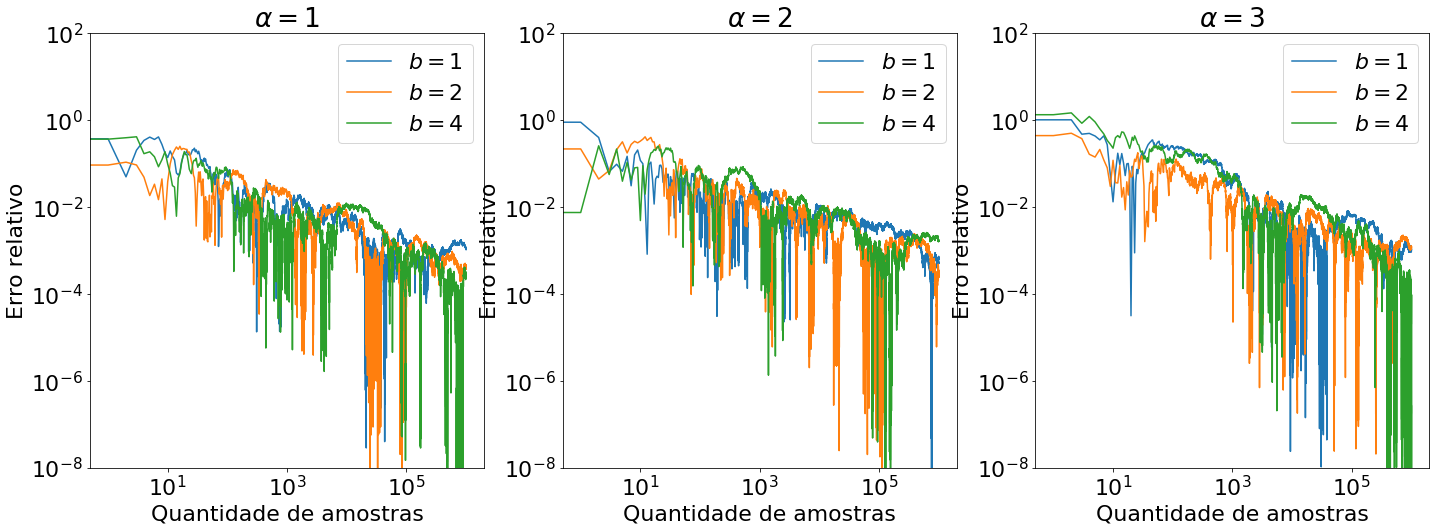

In [25]:
figure(figsize=(24,8))

k = 1
for i, α in enumerate(αs):
    subplot(1, 3, k)
    title(r"$\alpha = {}$".format(α))
    ylim([1e-8, 1e+2])
    xlabel("Quantidade de amostras")
    ylabel("Erro relativo")
    k += 1
    for j, b in enumerate(bs):
        loglog(abs(estimativas[i][j] - g(α, a, b)) / g(α, a, b), label=r"$b = {}$".format(b))
    legend()

In [26]:
v = lambda α, b: b ** (2 * α + 2) / (2 * α + 2) / (2 * α + 1)

In [27]:
xs = linspace(0, 10, 100)
ys = linspace(0, 10, 100)

X, Y = meshgrid(xs, ys)

Z = array([[v(x, y) for x in xs] for y in ys])

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


Text(0, 0.5, '$b$')

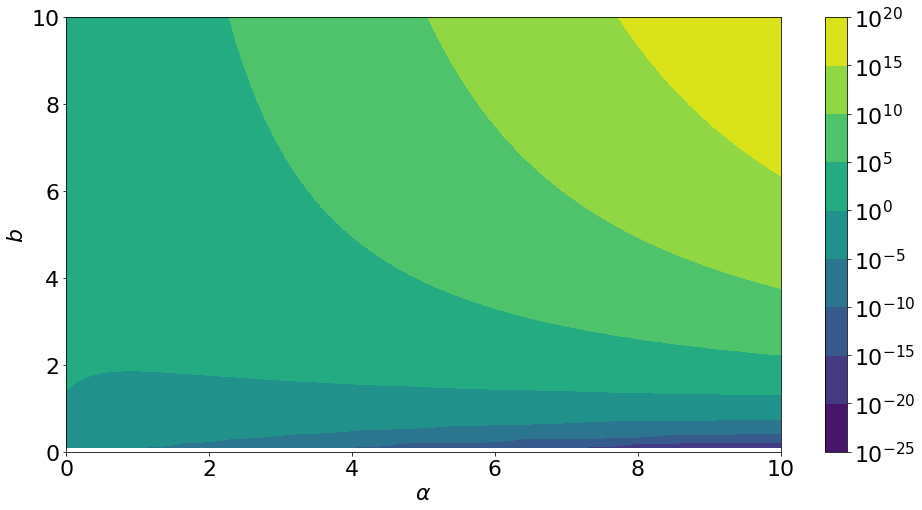

In [28]:
figure(figsize=(16,8))
contourf(X, Y, Z, norm=matplotlib.colors.LogNorm())
colorbar()
xlabel(r"$\alpha$")
ylabel(r"$b$")

# Questão 7

In [29]:
from time import time

In [30]:
def permuta(lista, k, rodadas):
    n = len(lista)
    lista2 = array(copy(lista))
    samples = np.random.rand(rodadas, k) * (lista2[:k])[::-1]
    samples = np.floor((samples) + lista2[:k]).astype(int)
    saida = np.zeros((rodadas, k))
    for r in range(rodadas):
        for i, j in enumerate(samples[r, :]):
            lista2[j], lista2[i] = lista2[i], lista2[j]
        saida[r, :] = lista2[:k]
    return saida

def medeTempo(lista, k, rodadas):
    started = time()
    permuta(lista, k, rodadas)
    return (time() - started) / rodadas

In [31]:
tempos = zeros((3, 4))
Ns = [1e+4, 1e+6, 1e+8]
ks = [10, 100, 1000, 10000]

for i, N in enumerate(Ns):
    for j, k in enumerate(ks):
        tempos[i, j] = medeTempo(range(int(N)), k, 1000) 
        print(i, j, tempos[i, j])

0 0 4.648685455322266e-06
0 1 2.9632091522216797e-05
0 2 0.0003211205005645752
0 3 0.00341367506980896
1 0 0.00016289710998535156
1 1 0.00016701602935791015
1 2 0.000448458194732666
1 3 0.00340451717376709
2 0 0.02177009034156799
2 1 0.021708173990249633
2 2 0.021876750230789183
2 3 0.024994794368743897


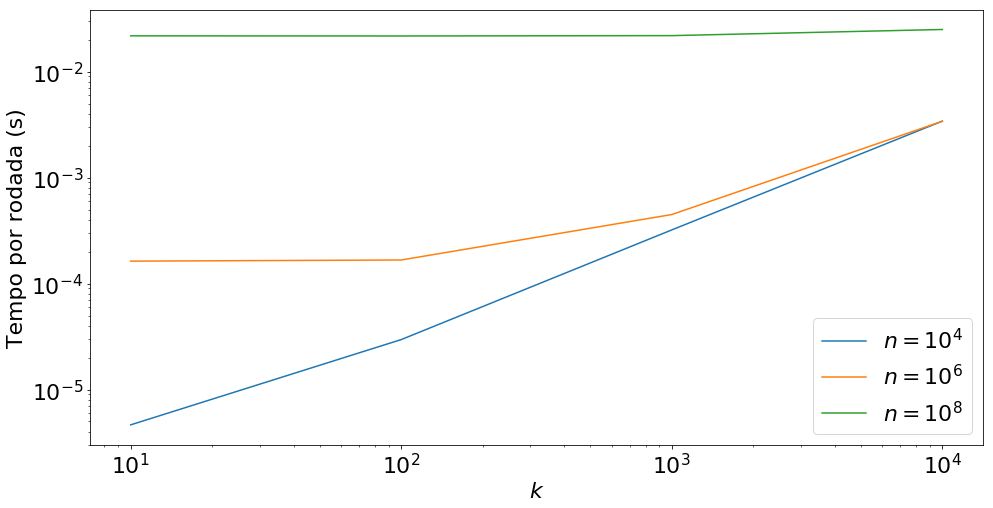

In [32]:
figure(figsize=(16,8))

for i,j in enumerate(tempos):
    loglog(ks, j, label = r"$n=10^{}$".format(int(log10(Ns[i]))))

xlabel("$k$")
ylabel("Tempo por rodada (s)")
legend()